In [5]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
import numpy as np
import os
import tensorflow as tf
import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [6]:

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    #compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    opt = Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [7]:
model = define_model()

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, InputLayer, ZeroPadding2D
from collections import defaultdict
import visualkeras
from PIL import ImageFont

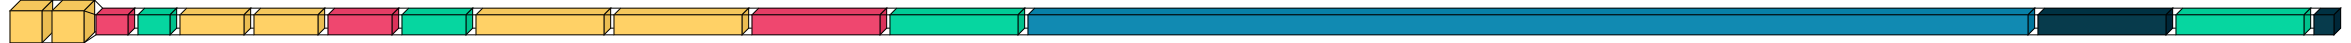

In [10]:
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

font = ImageFont.truetype("arial.ttf", 32)

visualkeras.layered_view(model, to_file='../figures/vgg16.png', type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='../figures/vgg16_legend.png', type_ignore=[visualkeras.SpacingDummyLayer],
                         legend=True, font=font)
visualkeras.layered_view(model, to_file='../figures/vgg16_spacing_layers.png', spacing=0)
visualkeras.layered_view(model, to_file='../figures/vgg16_type_ignore.png',
                         type_ignore=[ZeroPadding2D, Dropout, Flatten, visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='../figures/vgg16_color_map.png',
                         color_map=color_map, type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='../figures/vgg16_flat.png',
                         draw_volume=False, type_ignore=[visualkeras.SpacingDummyLayer])
visualkeras.layered_view(model, to_file='../figures/vgg16_scaling.png',
                         scale_xy=1, scale_z=1, max_z=1000, type_ignore=[visualkeras.SpacingDummyLayer])